In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import box, Polygon, MultiPolygon

In [2]:
gdf = gpd.read_file("dataset/l2022_survey_agri_italy.gpkg")

In [3]:
codes_names = {
    "B82": "Vineyards",
    "B81": "Olive groves",
    "B74": "Nuts trees",
    "B52": "Lucerne",
    "B11": "Common wheat",
    "E30": "Spontaneously re-vegetated surfaces",
    "F40": "Other bare soil",
    "B13": "Barley",
    "D20": "Shrubland without tree cover",
    "B16": "Maize",
    "E20": "Grassland without tree/shrub cover",
    "E10": "Grassland with sparse tree/shrub cover",
    "B41": "Dry pulses",
    "B31": "Sunflower",
    "B15": "Oats",
    "B84": "Permanent industrial crops",
    "B12": "Durum wheat",
    "B42": "Tomatoes",
    "B54": "Mixed cereals for fodder",
    "C10": "Broadleaved woodland",
    "B23": "Other root crops",
    "A22": "Non built-up linear features",
    "B43": "Other fresh vegetables",
    "B32": "Rape and turnip rape",
    "B33": "Soya",
    "D10": "Shrubland with sparse tree cover",
    "B14": "Rye",
    "G11": "Inland fresh water bodies",
    "B18": "Triticale",
    "B73": "Cherry fruit",
    "B37": "Other non-permanent industrial crops",
    "B35": "Other fibre and oleaginous crops",
    "B55": "Temporary grasslands",
    "F10": "Rocks and stones",
    "B75": "Other fruit trees and berries",
    "B53": "Other leguminous and mixtures for fodder",
    "B36": "Tobacco",
    "B83": "Nurseries",
    "C22": "Pine dominated coniferous woodland",
    "B72": "Pear fruit",
    "A30": "Other artificial areas",
    "A11": "Buildings with one to three floors",
    "B19": "Other cereals",
    "B17": "Rice",
    "A21": "Non built-up area features",
    "B76": "Oranges",
    "A13": "Greenhouses",
    "B77": "Other citrus fruit",
    "B34": "Cotton",
    "B22": "Sugar beet",
    "B21": "Potatoes",
    "G21": "Inland fresh running water",
    "B71": "Apple fruit",
    "C33": "Other mixed woodland",
    "B51": "Clovers",
    "B44": "Floriculture and ornamental plants",
    "C32": "Pine dominated mixed woodland",
    "H21": "Coastal wetlands",
}

In [7]:
gdf

,point_id,user_id,point_nuts0,pi_extension,point_ex_ante,point_lat,point_long,point_altitude,point_copernicus,point_grassland,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,47081562,ITSU409,IT,0,0,37.03131,14.316270,16,1,0,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((14.31651 37.03158, 14.31653 37..."
1,47101562,ITSU409,IT,0,0,37.03029,14.338540,17,1,0,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((14.33850 37.03031, 14.33850 37..."
2,47181564,ITSU409,IT,0,0,37.04428,14.428760,44,1,0,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((14.42833 37.04460, 14.42834 37..."
3,47141562,ITSU409,IT,0,0,37.02823,14.383080,103,1,0,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((14.36926 37.02420, 14.36926 37..."
4,47141558,ITSU409,IT,0,0,36.99195,14.380810,32,1,0,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((14.38028 36.99367, 14.38028 36..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,42021940,ITSU603,IT,0,0,40.54701,8.601797,371,1,0,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((8.60164 40.54686, 8.60163 40.5..."
4518,42021938,ITSU602,IT,0,0,40.52891,8.602195,458,1,1,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((8.60176 40.52960, 8.60176 40.5..."
4519,41961938,ITSU603,IT,0,0,40.52789,8.531731,267,1,0,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((8.53275 40.52521, 8.53275 40.5..."
4520,42001932,ITSU603,IT,0,0,40.47429,8.579919,245,1,0,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((8.57976 40.47420, 8.57976 40.4..."


In [8]:
gdf # Make compressed dataset with the point id and  the point lat and lon
gdf = gdf[["point_id", "point_lat", "point_long", "surveycprnlc"]].to_csv(
    "Lucas_points_2022.csv", index=False
)

In [4]:
gdf["surveycprnlc"].unique()

array(['A22', 'B54', 'B81', 'B55', 'B12', 'A21', 'F40', 'B82', 'E20',
       'E10', 'E30', 'B41', 'B53', 'B75', 'B43', 'B13', 'H11', 'B76',
       'B51', 'B83', 'B74', 'G21', 'D10', 'B15', 'D20', 'B71', 'A30',
       'B16', 'B23', 'C10', 'B52', 'B21', 'B73', 'B11', 'B42', 'B32',
       'B37', 'A13', 'B77', 'C33', 'B19', 'B35', 'A11', 'B45', 'B31',
       'B36', 'B18', 'B72', 'C32', 'F10', 'B33', 'B22', 'B17', 'G11',
       'B44', 'B84'], dtype=object)

In [22]:
gdf["surveycprnlc"].unique()

array(['A22', 'B54', 'B81', 'B55', 'B12', 'A21', 'F40', 'B82', 'E20',
       'E10', 'E30', 'B41', 'B53', 'B75', 'B43', 'B13', 'H11', 'B76',
       'B51', 'B83', 'B74', 'G21', 'D10', 'B15', 'D20', 'B71', 'A30',
       'B16', 'B23', 'C10', 'B52', 'B21', 'B73', 'B11', 'B42', 'B32',
       'B37', 'A13', 'B77', 'C33', 'B19', 'B35', 'A11', 'B45', 'B31',
       'B36', 'B18', 'B72', 'C32', 'F10', 'B33', 'B22', 'B17', 'G11',
       'B44', 'B84'], dtype=object)

In [23]:
sums_counts = gdf.groupby("surveycprnlc").agg(
    poly_area_sqm_sum=pd.NamedAgg(column="poly_area_sqm", aggfunc="sum"),
    count=pd.NamedAgg(column="poly_area_sqm", aggfunc="count")
).sort_values("poly_area_sqm_sum", ascending=False).reset_index()

In [24]:
sums_counts

,surveycprnlc,poly_area_sqm_sum,count
0,E20,2.371902e+06,906
1,B12,1.173401e+06,297
2,B52,9.111836e+05,272
3,B81,8.613939e+05,306
4,B82,7.403996e+05,236
5,B11,5.643493e+05,159
6,B54,4.970446e+05,142
7,B55,4.957189e+05,134
8,E10,4.271001e+05,167
9,B16,4.213396e+05,128


In [25]:
sums_counts["names"] = sums_counts["surveycprnlc"].map(codes_names)

In [29]:
sums_counts[sums_counts["count"] > 20]

,surveycprnlc,poly_area_sqm_sum,count,names
0,E20,2.371902e+06,906,Grassland without tree/shrub cover
1,B12,1.173401e+06,297,Durum wheat
2,B52,9.111836e+05,272,Lucerne
3,B81,8.613939e+05,306,Olive groves
4,B82,7.403996e+05,236,Vineyards
5,B11,5.643493e+05,159,Common wheat
6,B54,4.970446e+05,142,Mixed cereals for fodder
7,B55,4.957189e+05,134,Temporary grasslands
8,E10,4.271001e+05,167,Grassland with sparse tree/shrub cover
9,B16,4.213396e+05,128,Maize


<Axes: xlabel='names'>

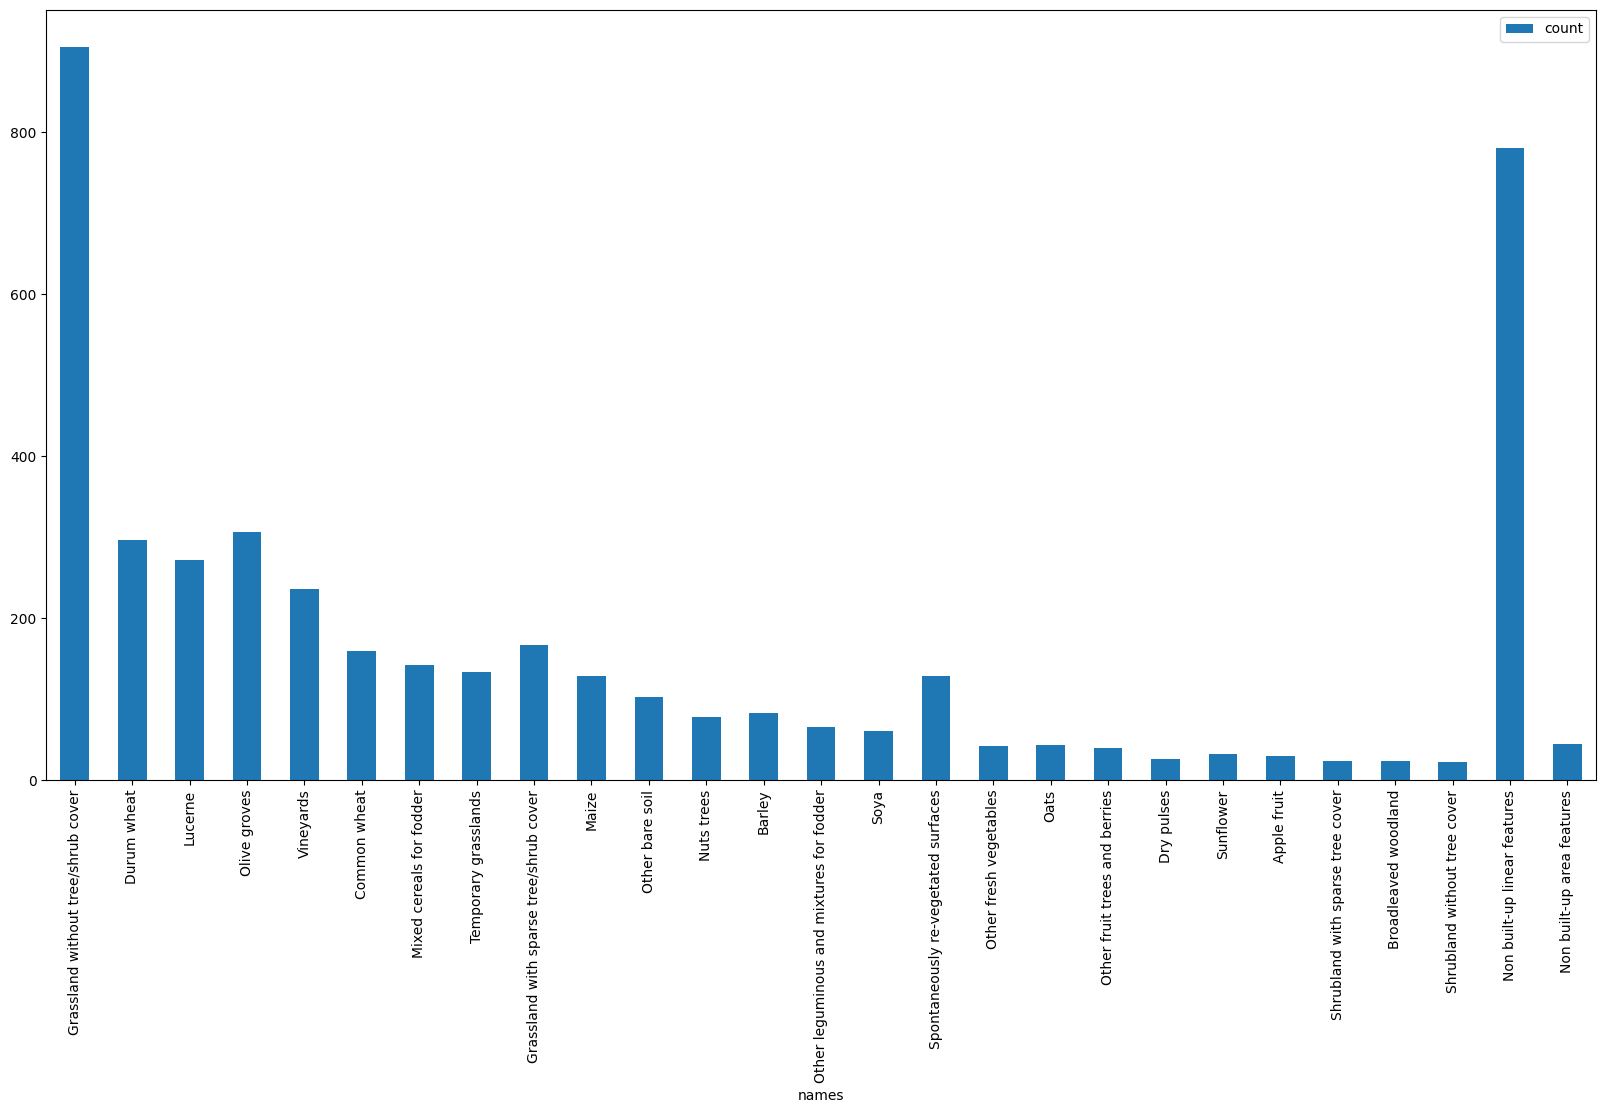

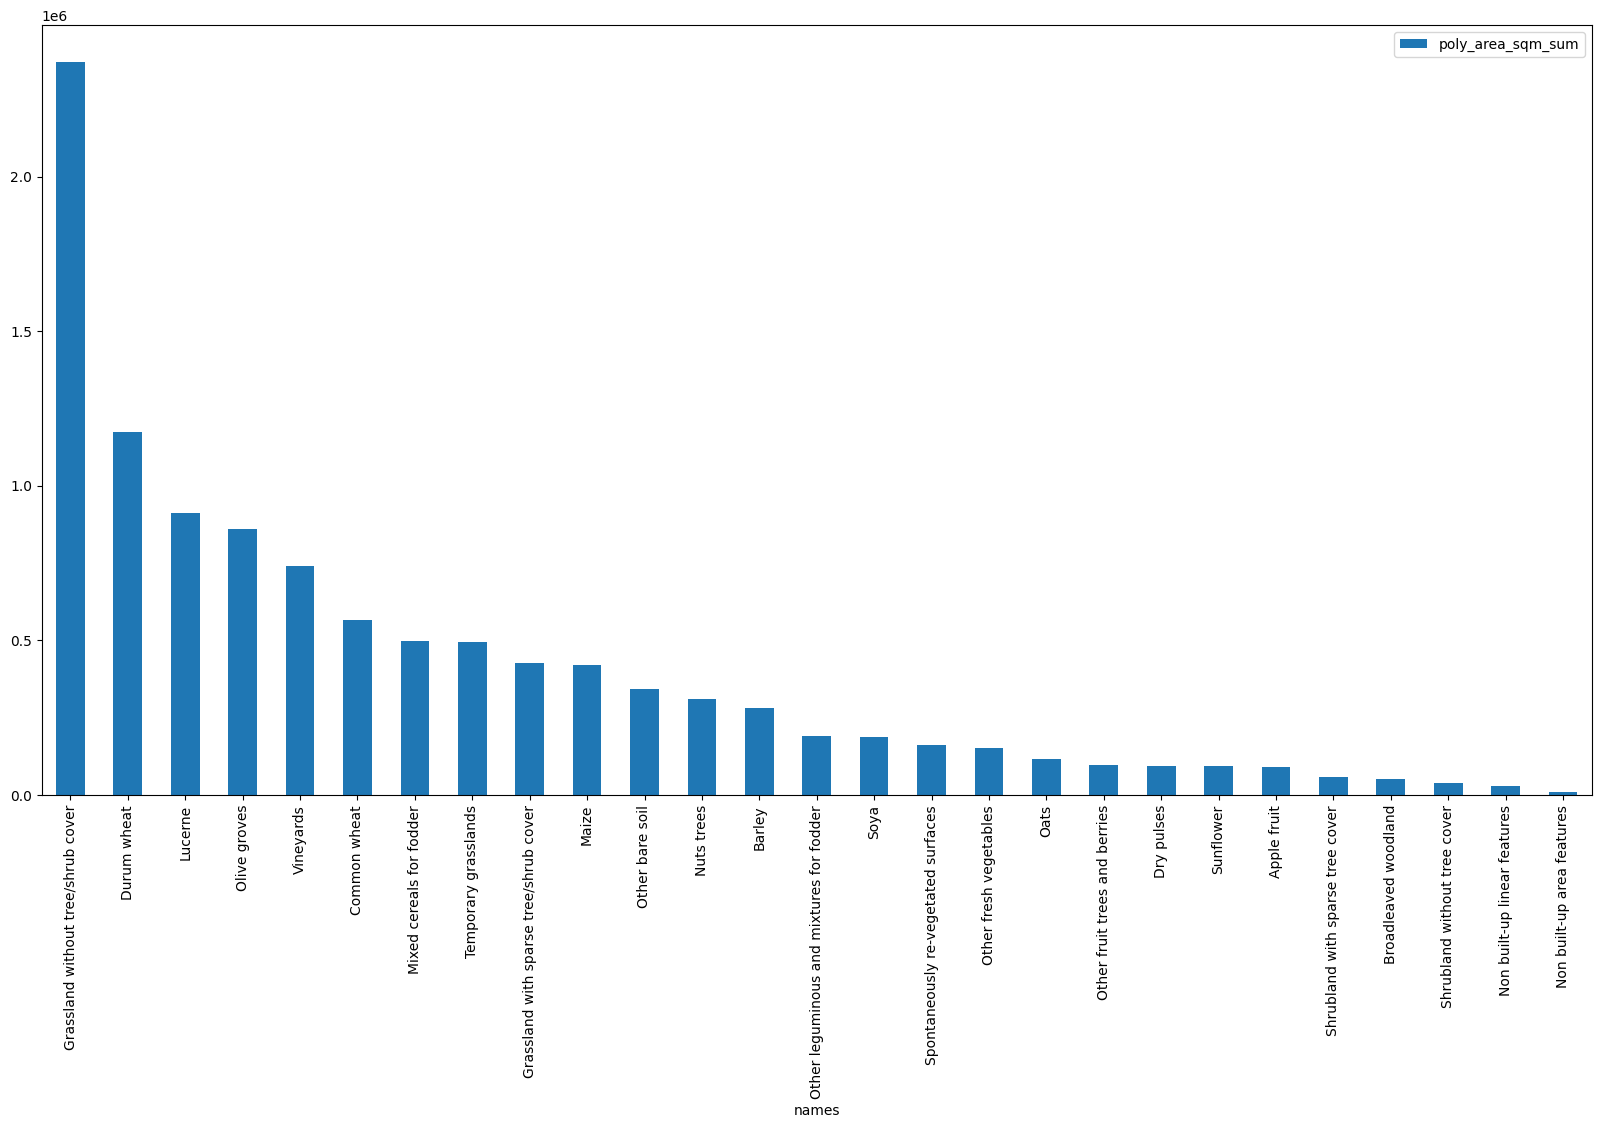

In [30]:
# Make to charts one for count and one for area
sums_counts[sums_counts["count"] > 20].plot.bar(x="names", y="count", figsize=(20, 10))
sums_counts[sums_counts["count"] > 20].plot.bar(
    x="names", y="poly_area_sqm_sum", figsize=(20, 10)
)

In [1]:
sums_counts

NameError: name 'sums_counts' is not defined

KeyError: 'poly_area_sqm'

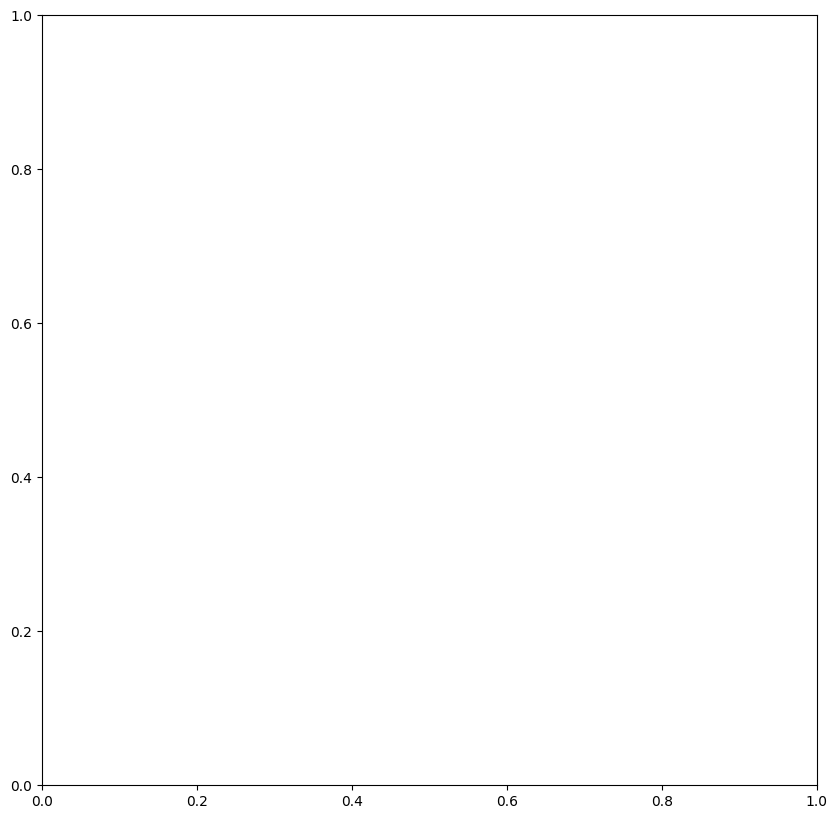

In [29]:
# Plot a bar chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
sums_counts.plot.barh(x="names", y="poly_area_sqm", ax=ax)